In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

import seaborn as sns
#sns.set(style='ticks', context='paper',
#        rc={'font.size': 6, 
#            'axes.titlesize': 7,
#                                   'axes.labelsize': 7,
#                                   'axes.labelpad': 2,
#                                   'xtick.labelsize': 5,
#                                   'ytick.labelsize': 5,
#                                   'legend.title_fontsize' : 5.5,
#                                   'legend.fontsize' : 5.5,
#                                   'legend.markerscale': 0.5,
#                                   'axes.spines.top': False,
#                                   'axes.spines.right': False,
#                                   'axes.linewidth': 0.4,
#                                   'xtick.major.width': 0.4,
#                                   'ytick.major.width': 0.4,
#                                   'xtick.major.size': 2.5,
#                                   'ytick.major.size': 2.5,
#                                   'xtick.minor.size': 1.5,
#                                   'ytick.minor.size': 1.5,
#                                   'xtick.minor.width': 0.2,
#                                   'ytick.minor.width': 0.2,
#                                   'figure.constrained_layout.use': True,
#                                   'figure.dpi': 200})

id_columns = ['architecture', 'task', 'kind', 'source', 'layer']
tf_to_pt_layer_map = {'encode_2': 'layer1.0.relu', 'encode_3': 'layer1.1.relu', 
                      'encode_4': 'layer2.0.relu', 'encode_5': 'layer2.1.relu', 
                      'encode_6': 'layer3.0.relu', 'encode_7': 'layer3.1.relu', 
                      'encode_8': 'layer4.0.relu', 'encode_9': 'layer4.1.relu'}


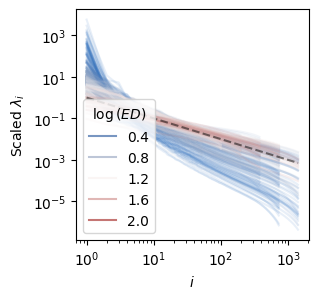

In [16]:
dataset = 'imagenet'
data = pd.merge(pd.read_csv(f'../../results/eigspectra|dataset:{dataset}|pooling:True|grayscale:False.csv'),
                pd.read_csv(f'../../results/eigmetrics|dataset:{dataset}|pooling:True|grayscale:False.csv'),
                on=id_columns)
#data = pd.merge(pd.read_csv(f'/home/wtownle1/encoder_dimensionality/results/eigmetrics|dataset:imagenet|pooling:True|grayscale:False.csv'),
#                pd.read_csv(f'/home/wtownle1/encoder_dimensionality/results/eigspectra|dataset:imagenet|pooling:True|grayscale:False.csv'),
#                on=id_columns)

data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)
data['id'] = data[id_columns].sum(axis='columns')

# Remove outlier low-variance points at the final PCs
def is_outlier(i):
    i = np.log(i)
    cutoff = 0.95 * i.iloc[-1]
    return i > cutoff
outlier = data.groupby(id_columns)['n'].transform(is_outlier)
data = data[~outlier]

# Set y-intercept to 1
def get_scaled_var(x):
    i, y = x['n'].values, x['variance'].values
    i, y = np.log(i), np.log(y)
    intercept = LinearRegression().fit(i.reshape(-1, 1), y).intercept_
    intercept = np.exp(intercept)
    return x['variance'] / intercept
scaled_var = data.groupby(id_columns).apply(get_scaled_var)
scaled_var = scaled_var.reset_index(id_columns, drop=True)
data['scaled_variance'] = scaled_var

# Log(ED)
data['log_ed'] = np.log10(data['effective dimensionality'])

fig, ax = plt.subplots(figsize=(3, 3))

sns.lineplot(data=data, x='n', y='scaled_variance', hue='log_ed',
             units='id', alpha=0.1, estimator=None,
             palette=sns.color_palette('vlag', as_cmap=True), ax=ax)
ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
ax.set(xlabel=r'$i$', ylabel=r'Scaled $\lambda_i$', xscale='log', yscale='log')

ax.legend(title=r'$\log{(ED)}$')

plt.savefig('saved_figs/results_eigspectrum_vs_ed.png', dpi=300)
plt.show()

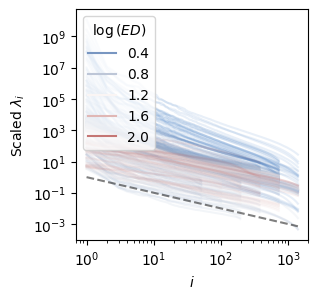

In [12]:
#unscaled variance

fig, ax = plt.subplots(figsize=(3, 3))

sns.lineplot(data=data, x='n', y='variance', hue='log_ed',
             units='id', alpha=0.1, estimator=None,
             palette=sns.color_palette('vlag', as_cmap=True), ax=ax)
ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
ax.set(xlabel=r'$i$', ylabel=r'Scaled $\lambda_i$', xscale='log', yscale='log')

ax.legend(title=r'$\log{(ED)}$')

plt.show()

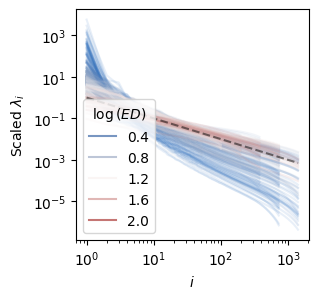

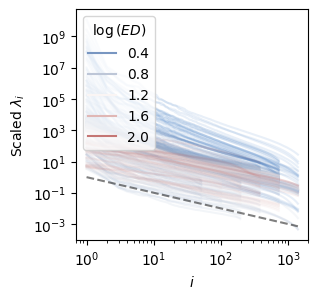

In [14]:
#dont remove outliers
#scaled v unscaled

#data2 = pd.merge(pd.read_csv(f'../../results/eigspectra|dataset:{dataset}|pooling:True|grayscale:False.csv'),
#                pd.read_csv(f'../../results/eigmetrics|dataset:{dataset}|pooling:True|grayscale:False.csv'),
#                on=id_columns)
data2 = pd.merge(pd.read_csv(f'/home/wtownle1/encoder_dimensionality/results/eigmetrics|dataset:imagenet|pooling:True|grayscale:False.csv'),
                pd.read_csv(f'/home/wtownle1/encoder_dimensionality/results/eigspectra|dataset:imagenet|pooling:True|grayscale:False.csv'),
                on=id_columns)

data2.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)
data2['id'] = data[id_columns].sum(axis='columns')

# Set y-intercept to 1
def get_scaled_var(x):
    i, y = x['n'].values, x['variance'].values
    i, y = np.log(i), np.log(y)
    intercept = LinearRegression().fit(i.reshape(-1, 1), y).intercept_
    intercept = np.exp(intercept)
    return x['variance'] / intercept
scaled_var = data2.groupby(id_columns).apply(get_scaled_var)
scaled_var = scaled_var.reset_index(id_columns, drop=True)
data2['scaled_variance'] = scaled_var

# Log(ED)
data2['log_ed'] = np.log10(data['effective dimensionality'])

fig, ax = plt.subplots(figsize=(3, 3))

sns.lineplot(data=data2, x='n', y='scaled_variance', hue='log_ed',
             units='id', alpha=0.1, estimator=None,
             palette=sns.color_palette('vlag', as_cmap=True), ax=ax)
ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
ax.set(xlabel=r'$i$', ylabel=r'Scaled $\lambda_i$', xscale='log', yscale='log')

ax.legend(title=r'$\log{(ED)}$')

plt.show()


fig, ax = plt.subplots(figsize=(3, 3))

sns.lineplot(data=data2, x='n', y='variance', hue='log_ed',
             units='id', alpha=0.1, estimator=None,
             palette=sns.color_palette('vlag', as_cmap=True), ax=ax)
ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
ax.set(xlabel=r'$i$', ylabel=r'Scaled $\lambda_i$', xscale='log', yscale='log')

ax.legend(title=r'$\log{(ED)}$')

plt.show()

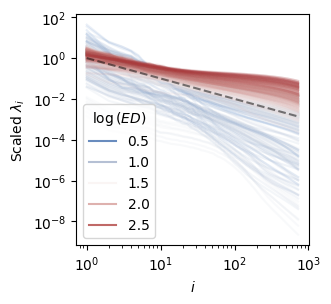

In [15]:
#Pooling = False

dataset = 'imagenet'
data = pd.merge(pd.read_csv(f'../../results/eigspectra|dataset:{dataset}|pooling:False|grayscale:False.csv'),
                pd.read_csv(f'../../results/eigmetrics|dataset:{dataset}|pooling:False|grayscale:False.csv'),
                on=id_columns)
#data = pd.merge(pd.read_csv(f'/home/wtownle1/encoder_dimensionality/results/eigmetrics|dataset:imagenet|pooling:True|grayscale:False.csv'),
#                pd.read_csv(f'/home/wtownle1/encoder_dimensionality/results/eigspectra|dataset:imagenet|pooling:True|grayscale:False.csv'),
#                on=id_columns)

data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)
data['id'] = data[id_columns].sum(axis='columns')

# Remove outlier low-variance points at the final PCs
def is_outlier(i):
    i = np.log(i)
    cutoff = 0.95 * i.iloc[-1]
    return i > cutoff
outlier = data.groupby(id_columns)['n'].transform(is_outlier)
data = data[~outlier]

# Set y-intercept to 1
def get_scaled_var(x):
    i, y = x['n'].values, x['variance'].values
    i, y = np.log(i), np.log(y)
    intercept = LinearRegression().fit(i.reshape(-1, 1), y).intercept_
    intercept = np.exp(intercept)
    return x['variance'] / intercept
scaled_var = data.groupby(id_columns).apply(get_scaled_var)
scaled_var = scaled_var.reset_index(id_columns, drop=True)
data['scaled_variance'] = scaled_var

# Log(ED)
data['log_ed'] = np.log10(data['effective dimensionality'])

fig, ax = plt.subplots(figsize=(3, 3))

sns.lineplot(data=data, x='n', y='scaled_variance', hue='log_ed',
             units='id', alpha=0.1, estimator=None,
             palette=sns.color_palette('vlag', as_cmap=True), ax=ax)
ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
ax.set(xlabel=r'$i$', ylabel=r'Scaled $\lambda_i$', xscale='log', yscale='log')

ax.legend(title=r'$\log{(ED)}$')

plt.savefig('saved_figs/eigspectrum_ed_nopooling.png', dpi=300)
plt.show()

(array([  4224.,  27264., 174528.,  71296.,  29376.,  38400.,  27904.,
         22336.,  25152.,  12288.]),
 array([0.68699066, 0.86607408, 1.04515751, 1.22424093, 1.40332436,
        1.58240778, 1.7614912 , 1.94057463, 2.11965805, 2.29874148,
        2.4778249 ]),
 <BarContainer object of 10 artists>)

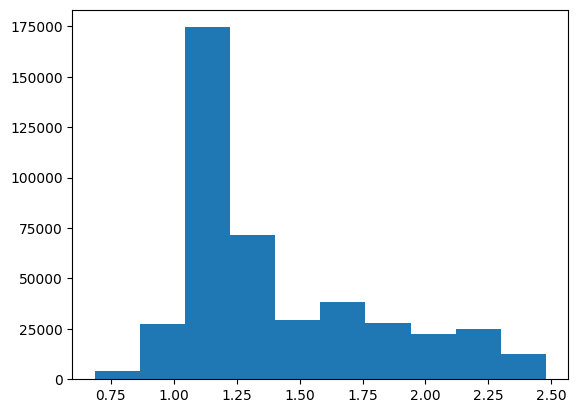

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

id_columns = ['architecture', 'task', 'kind', 'source', 'layer']
tf_to_pt_layer_map = {'encode_2': 'layer1.0.relu', 'encode_3': 'layer1.1.relu', 
                      'encode_4': 'layer2.0.relu', 'encode_5': 'layer2.1.relu', 
                      'encode_6': 'layer3.0.relu', 'encode_7': 'layer3.1.relu', 
                      'encode_8': 'layer4.0.relu', 'encode_9': 'layer4.1.relu'}

data_gp = pd.merge(pd.read_csv('/home/wtownle1/encoder_dimensionality/results/eigmetrics|dataset:imagenet|pooling:True|grayscale:False.csv'),
                pd.read_csv(f'/home/wtownle1/encoder_dimensionality/results/eigspectra|dataset:imagenet|pooling:True|grayscale:False.csv'),
                on=id_columns)
data_np = pd.merge(pd.read_csv('/home/wtownle1/encoder_dimensionality/results/eigmetrics|dataset:imagenet|pooling:False|grayscale:False.csv'),
                pd.read_csv('/home/wtownle1/encoder_dimensionality/results/eigspectra|dataset:imagenet|pooling:False|grayscale:False.csv'),
                on=id_columns)

alpha_gp = np.asarray(data_gp.loc[:,'alpha']).reshape(-1,1)
alpha_np = np.asarray(data_np.loc[:,'alpha']).reshape(-1,1)
plt.hist(alpha_gp)

(array([ 69632., 115712., 174080.,  86016.,  28672.,  31744.,  15360.,
         14336.,   3072.,  10240.]),
 array([0.41092175, 0.59775161, 0.78458147, 0.97141133, 1.15824119,
        1.34507105, 1.53190091, 1.71873078, 1.90556064, 2.0923905 ,
        2.27922036]),
 <BarContainer object of 10 artists>)

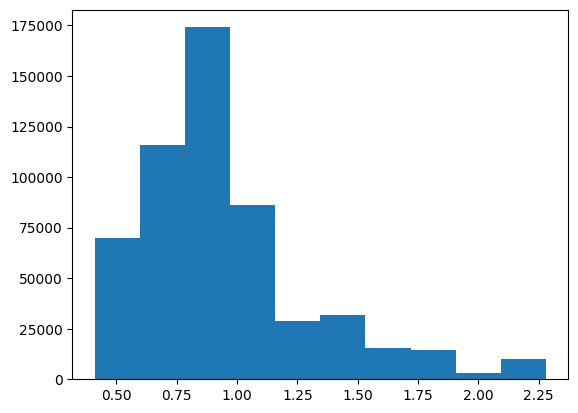

In [5]:
plt.hist(alpha_np)